In [1]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import re

import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
import scikit_posthocs as sp
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data,config,tr=False):
    new_data = pd.DataFrame()
    new_data["score"] = data["full_name"].map(lambda x: x.split("_")[0])
    new_data["classize"] = data["full_name"].map(lambda x: x.split("_")[1].split("-")[1])
    new_data["instance"] = data["full_name"].map(lambda x: x.split("_")[2].split("-")[1])
    new_data["repetition"] = data["full_name"].map(lambda x: x.split("_")[3].split("-")[1])
    new_data["population_size"] = data["full_name"].map(lambda x: x.split("_")[4].split("-")[1])
    new_data["groupsize"] = data["full_name"].map(lambda x: x.split("_")[5].split("-")[1])
    new_data["best_fitness"] = data["best_fitness"]
    new_data["final_time"] = data["final_time"]
    new_data["optimal_solution"] = data["optimal_solution"]
    new_data["configuration"] = data["configuration"].map(lambda x: re.sub("RWS_","RWS-",x))
    if tr:
        new_data["configuration"] = new_data["configuration"].map(lambda x: re.sub("\)","",x)) +", "+ new_data["population_size"] + ")"
        new_data["partition_type"] = "training"
    else:
        new_data["partition_type"] = "test"
    new_data["full_name"] = data["full_name"]
    new_data["normalized_fitness"] = new_data["best_fitness"]/new_data["optimal_solution"]
    new_data["iterations"] = data["iterations"]
    # new_data["configuration"] = new_data["configuration"].map(literal_eval)
    new_data = new_data[new_data["configuration"]==config]
    return new_data

In [3]:
configs = [('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100),
('CX', 0.7, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL', 100),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 100),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',100),
('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL',100),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'RandomisedMasking', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'RSM', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'RSM', 0.2, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL',50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50),
('CX', 0.9, 'InheritMask', 'SS', 0.4, 'DivisionSelect', 'RWS-sp-1.5', 'EL', 50)]
configs = list(map(str,configs))

route = "training_data/"
datalist_names = ["belbin-20-3to5","belbin-30-3to5","belbin-40-3to5",
                  "belbin-20-4to4", "belbin-20-5to5","belbin-30-3to3",
                  "belbin-30-5to5","belbin-40-4to4","belbin-40-5to5",
                  "belbin-60-3to3","belbin-60-4to4",
                  "mbti-20-3to5","mbti-30-3to5","mbti-40-3to5",
                  "mbti-20-4to4", "mbti-20-5to5","mbti-30-3to3",
                  "mbti-30-5to5","mbti-40-4to4","mbti-40-5to5",
                  "mbti-60-3to3","mbti-60-4to4"]
datalist_final_train = []
datalist_it_train = []
datalist_final_test = []
datalist_it_test = []
for i in range(len(datalist_names)):
    name = datalist_names[i]
    config = configs[i]
    route2 = route+name+"-training_experiments_"
    route_final = route2 + "final.csv"
    route_it = route2 + "it.csv"
    df,dit = pd.read_csv(route_final),pd.read_csv(route_it)
    datalist_final_train.append(preprocess_data(df,config,True))
    datalist_it_train.append(preprocess_data(dit,config,True))

    # if "60" not in name:
    route2 = "test_data/"+name+"-test_experiments_"
    route_final = route2 + "final.csv"
    route_it = route2 + "it.csv"
    df,dit = pd.read_csv(route_final),pd.read_csv(route_it)
    datalist_final_test.append(preprocess_data(df,config))
    datalist_it_test.append(preprocess_data(dit,config))

full_final = pd.concat([pd.concat(datalist_final_train),pd.concat(datalist_final_test)])
full_it = pd.concat([pd.concat(datalist_it_train),pd.concat(datalist_it_test)])

In [4]:
full_final["clasif1"] = full_final["score"] + "-classize_" + full_final["classize"].astype(str) + "-groupsize_" + full_final["groupsize"]
full_final["isoptimal"] = full_final["normalized_fitness"].map(lambda x: 1 if x >= 1 else 0)

full_it["clasif1"] = full_it["score"] + "-classize_" + full_it["classize"].astype(str) + "-groupsize_" + full_it["groupsize"]
full_it["isoptimal"] = full_it["normalized_fitness"].map(lambda x: 1 if x >= 1 else 0)

In [5]:
full_it.reset_index()

,index,score,classize,instance,repetition,population_size,groupsize,best_fitness,final_time,optimal_solution,configuration,partition_type,full_name,normalized_fitness,iterations,clasif1,isoptimal
0,528,belbin,20,1,1,100,3to5,3.875,0.000000,4.125,"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...",training,belbin_classize-20_instance-1_repetition-1_pop...,0.939394,0,belbin-classize_20-groupsize_3to5,0
1,529,belbin,20,1,1,100,3to5,4.000,0.153560,4.125,"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...",training,belbin_classize-20_instance-1_repetition-1_pop...,0.969697,1,belbin-classize_20-groupsize_3to5,0
2,530,belbin,20,1,1,100,3to5,4.000,0.157528,4.125,"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...",training,belbin_classize-20_instance-1_repetition-1_pop...,0.969697,2,belbin-classize_20-groupsize_3to5,0
3,531,belbin,20,1,1,100,3to5,4.125,0.152635,4.125,"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...",training,belbin_classize-20_instance-1_repetition-1_pop...,1.000000,3,belbin-classize_20-groupsize_3to5,1
4,580,belbin,20,1,2,100,3to5,3.875,0.000000,4.125,"('NWOX', 0.9, 'InheritMask', 'SS', 0.4, 'Rando...",training,belbin_classize-20_instance-1_repetition-2_pop...,0.939394,0,belbin-classize_20-groupsize_3to5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137767,1810,mbti,60,29,10,50,4to4,9.250,0.594314,9.500,"('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Divisio...",test,mbti_classize-60_instance-29_repetition-10_pop...,0.973684,14,mbti-classize_60-groupsize_4to4,0
137768,1811,mbti,60,29,10,50,4to4,9.250,0.608069,9.500,"('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Divisio...",test,mbti_classize-60_instance-29_repetition-10_pop...,0.973684,15,mbti-classize_60-groupsize_4to4,0
137769,1812,mbti,60,29,10,50,4to4,9.250,0.591489,9.500,"('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Divisio...",test,mbti_classize-60_instance-29_repetition-10_pop...,0.973684,16,mbti-classize_60-groupsize_4to4,0
137770,1813,mbti,60,29,10,50,4to4,9.375,0.591695,9.500,"('CX', 0.9, 'InheritMask', 'SS', 0.4, 'Divisio...",test,mbti_classize-60_instance-29_repetition-10_pop...,0.986842,17,mbti-classize_60-groupsize_4to4,0


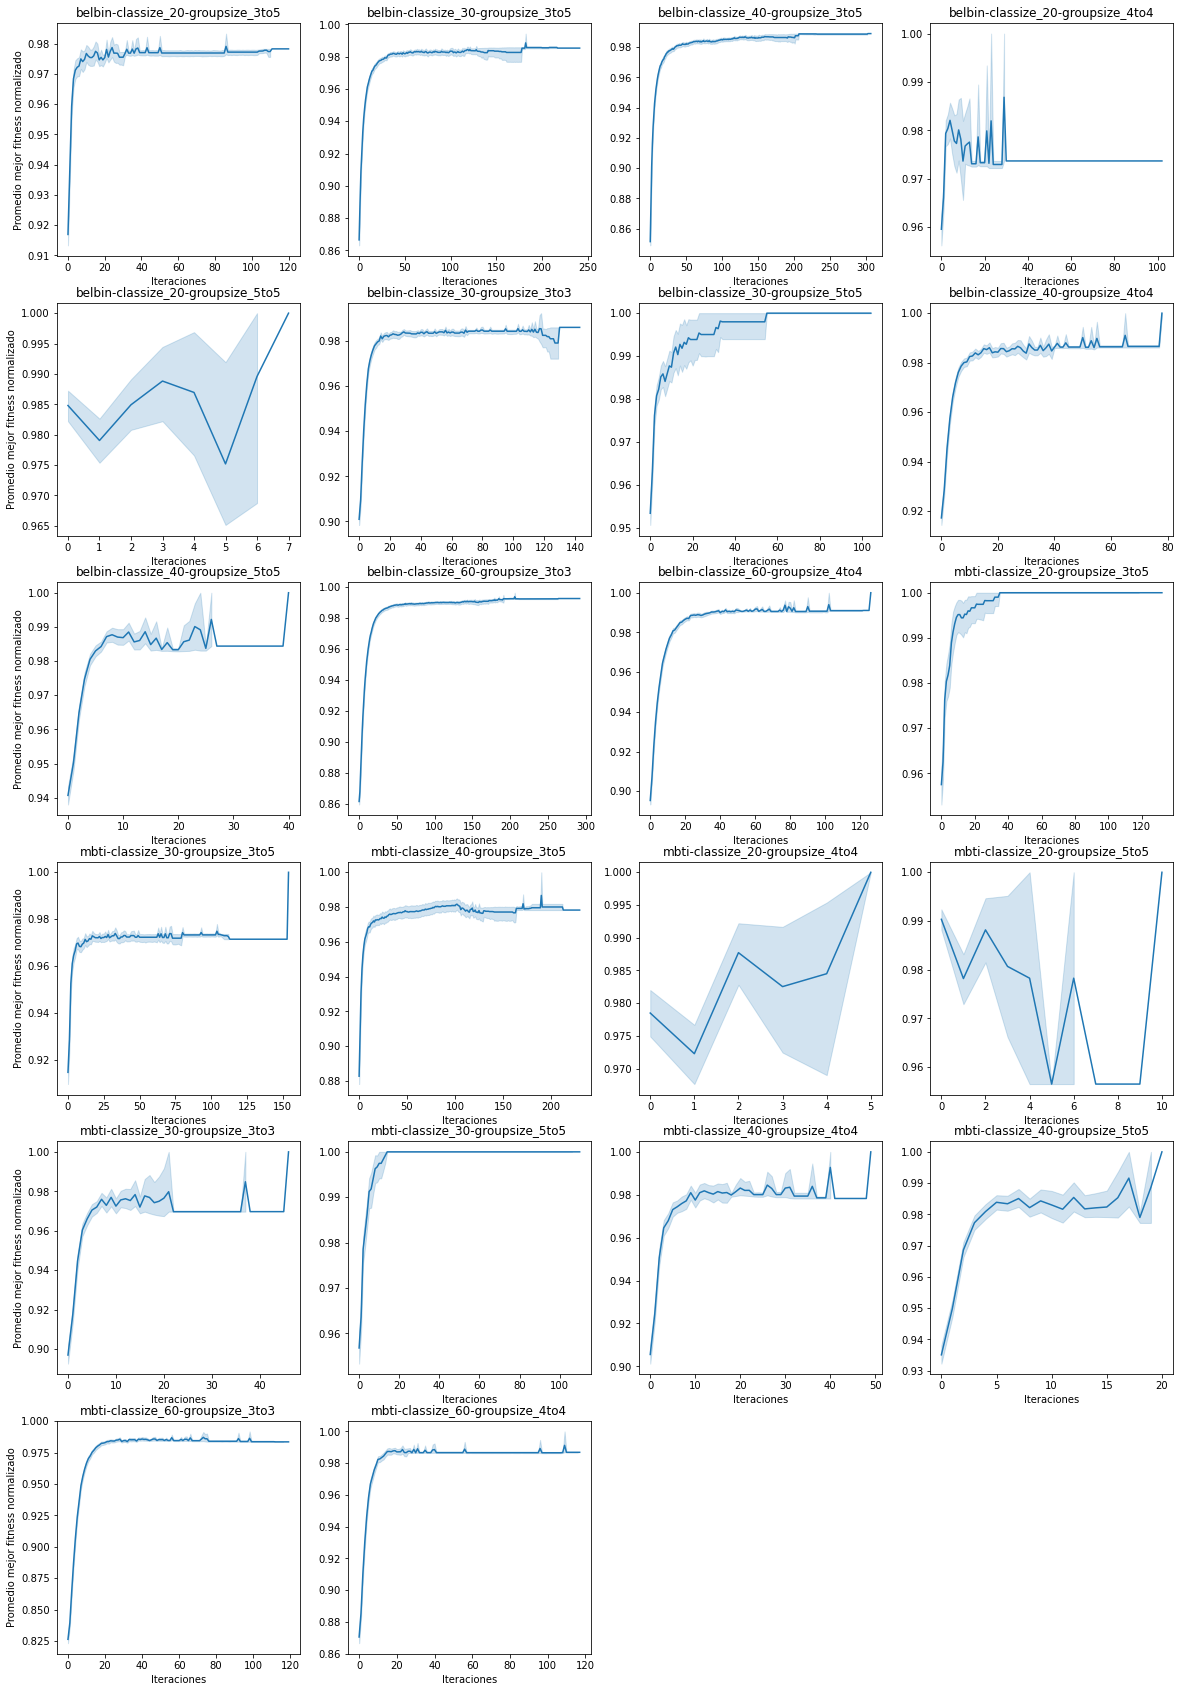

In [7]:
plt.figure(figsize=(20,30))
j=0        
for v in pd.unique(full_it["clasif1"]):
    j+=1
    plt.subplot(6,4,j)
    subset = full_it[full_it["clasif1"]==v].reset_index()
    sns.lineplot(x="iterations",y="normalized_fitness",data=subset)
    plt.xlabel("Iteraciones")
    if j%4==1:
        plt.ylabel("Promedio mejor fitness normalizado")
    else:
        plt.ylabel("")
    plt.title(f"{v}")
    # plt.legend(title="Configuración",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Soluciones óptimas totales: 6219
Ejecuciones totales: 6600
0.9422727272727273


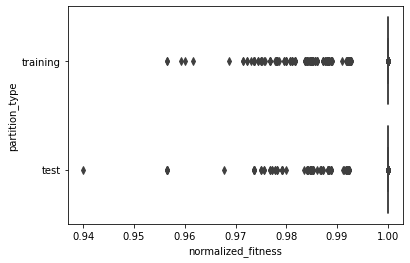

In [5]:
print(f"Soluciones óptimas totales: {sum(full_final['isoptimal'])}")
print(f"Ejecuciones totales: {full_final.shape[0]}")
print(sum(full_final['isoptimal'])/full_final.shape[0])
sns.boxplot(x="normalized_fitness",y = "partition_type",data=full_final)
plt.show()

In [6]:
trg = full_final[["partition_type","isoptimal"]].groupby("partition_type").agg(["sum","count"])
trg.columns = ["suma","cuenta"]
trg["prop"] = trg["suma"]/trg["cuenta"]
trg

,suma,cuenta,prop
partition_type,,,
test,1865,1980,0.941919
training,4354,4620,0.942424


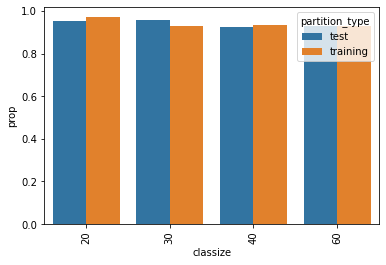

<AxesSubplot:xlabel='normalized_fitness', ylabel='classize'>

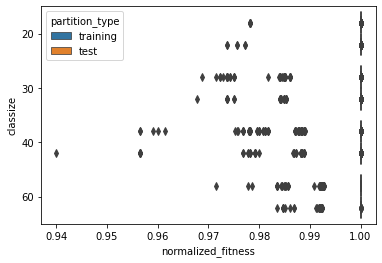

In [7]:
trg = full_final[["partition_type","classize","isoptimal"]].groupby(["partition_type","classize"]).agg(["sum","count"])
trg.columns = ["suma","cuenta"]
trg["prop"] = trg["suma"]/trg["cuenta"]
trg.reset_index(inplace=True)

sns.barplot(x="classize",y="prop",data=trg,hue="partition_type")
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="normalized_fitness",y="classize",data=full_final, hue="partition_type")

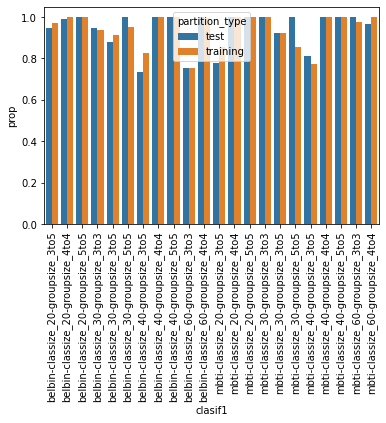

<AxesSubplot:xlabel='normalized_fitness', ylabel='clasif1'>

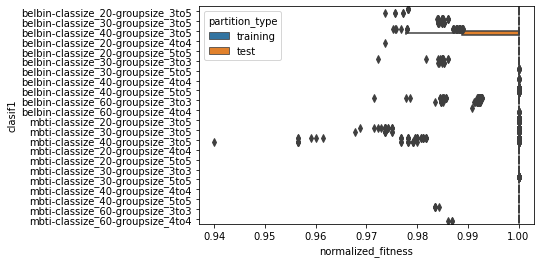

In [8]:
trg = full_final[["partition_type","clasif1","isoptimal"]].groupby(["partition_type","clasif1"]).agg(["sum","count"])
trg.columns = ["suma","cuenta"]
trg["prop"] = trg["suma"]/trg["cuenta"]
trg.reset_index(inplace=True)

sns.barplot(x="clasif1",y="prop",data=trg,hue="partition_type")
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x="normalized_fitness",y="clasif1",data=full_final, hue="partition_type")

In [9]:
trg

,partition_type,clasif1,suma,cuenta,prop
0,test,belbin-classize_20-groupsize_3to5,85,90,0.944444
1,test,belbin-classize_20-groupsize_4to4,89,90,0.988889
2,test,belbin-classize_20-groupsize_5to5,90,90,1.000000
3,test,belbin-classize_30-groupsize_3to3,85,90,0.944444
4,test,belbin-classize_30-groupsize_3to5,79,90,0.877778
5,test,belbin-classize_30-groupsize_5to5,90,90,1.000000
6,test,belbin-classize_40-groupsize_3to5,66,90,0.733333
7,test,belbin-classize_40-groupsize_4to4,90,90,1.000000
8,test,belbin-classize_40-groupsize_5to5,90,90,1.000000
9,test,belbin-classize_60-groupsize_3to3,68,90,0.755556


In [11]:
full_final[["partition_type","clasif1","isoptimal","final_time"]].groupby(["clasif1"]).mean()

,isoptimal,final_time
clasif1,,
belbin-classize_20-groupsize_3to5,0.963333,1.550172
belbin-classize_20-groupsize_4to4,0.996667,0.399492
belbin-classize_20-groupsize_5to5,1.000000,0.086895
belbin-classize_30-groupsize_3to3,0.940000,8.046457
belbin-classize_30-groupsize_3to5,0.903333,13.255571
belbin-classize_30-groupsize_5to5,0.966667,1.453832
belbin-classize_40-groupsize_3to5,0.796667,26.843181
belbin-classize_40-groupsize_4to4,1.000000,4.450129
belbin-classize_40-groupsize_5to5,1.000000,1.924217


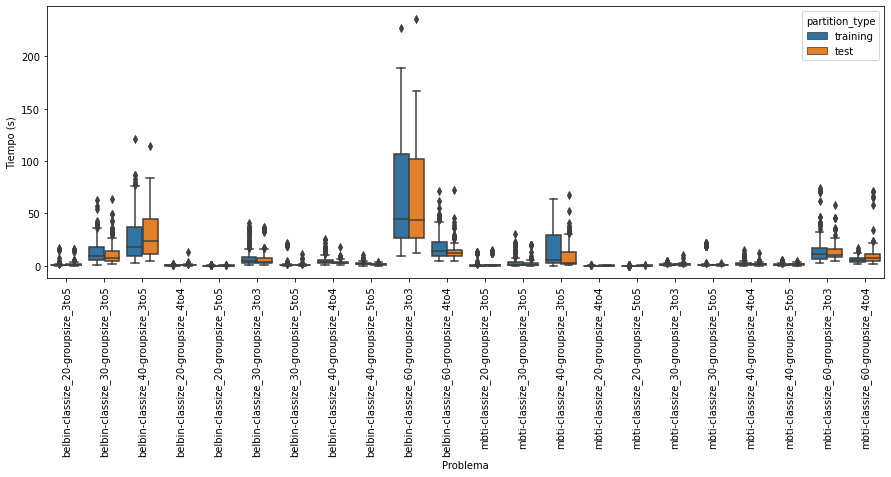

In [9]:
plt.figure(figsize=(15,5))
sns.boxplot(x="clasif1",y="final_time",data=full_final,hue="partition_type")
plt.xticks(rotation=90)
plt.xlabel("Problema")
plt.ylabel("Tiempo (s)")
plt.show()

Comparación de los resultados con los métodos exactos

In [10]:
full_final2 = full_final.rename(columns={"score":"score_type","classize":"class_size",
                           "final_time":"resolution_time","groupsize":"group_size"})
full_final2 = full_final2[["score_type","class_size","resolution_time","repetition","instance","group_size"]]
full_final2["method"] = "GA"

exactos = pd.read_csv("../exact_model_dir/Experiment results/experiment_data.csv")
exactos = exactos[["class_size","instance","rep","solver","resolution_time","score_type","group_size"]]
exactos.rename(columns={"solver":"method","rep":"repetition"},inplace=True)
exactos.head()

full = pd.concat([full_final2,exactos])
full["group_size"][full["group_size"]=="4"]="4to4"
full["group_size"][full["group_size"]=="3"]="3to3"
full["group_size"][full["group_size"]=="5"]="5to5"
full["group_size"][full["group_size"]=="3-5"]="3to5"
full["class_size"] = full["class_size"].astype(int)
full

,score_type,class_size,resolution_time,repetition,instance,group_size,method
175,belbin,20,0.467854,1,1,3to5,GA
191,belbin,20,0.321555,2,1,3to5,GA
207,belbin,20,0.343430,3,1,3to5,GA
223,belbin,20,0.341845,4,1,3to5,GA
239,belbin,20,0.314632,5,1,3to5,GA
...,...,...,...,...,...,...,...
7005,belbin,40,80.119315,5,11,4to4,SCIP
7006,belbin,40,5462.540578,5,11,5to5,SCIP
7007,belbin,40,80.452966,2,12,4to4,SCIP
7008,belbin,40,5436.474564,2,12,5to5,SCIP


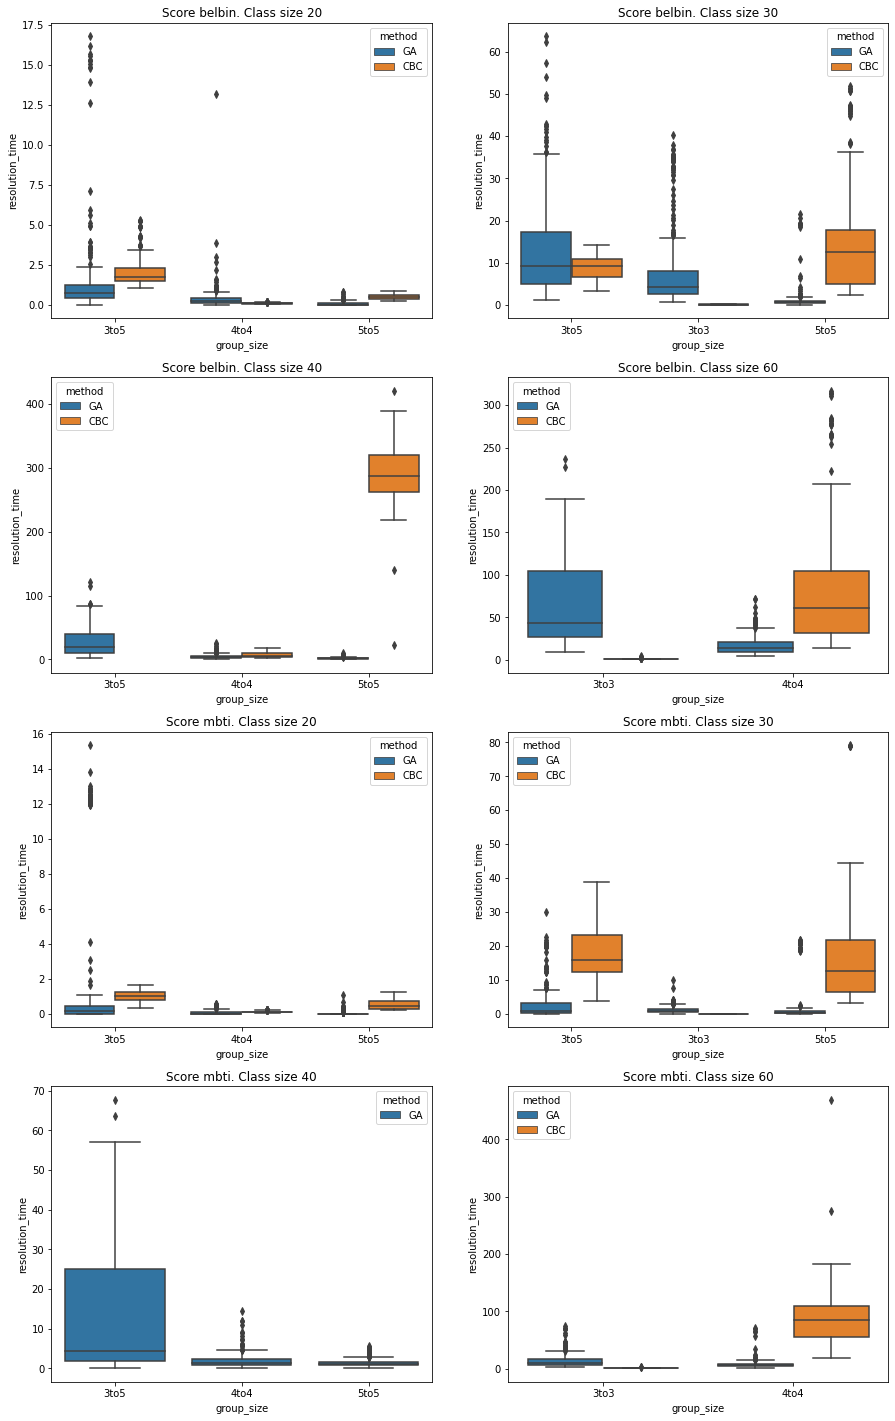

In [11]:
plt.figure(figsize=(15,25))
j=0
for score in pd.unique(full["score_type"]):
    for class_size in pd.unique(full["class_size"]):
        j+=1
        plt.subplot(4,2,j)
        d = full[(full["class_size"]==class_size)&(full["score_type"]==score)]
        d = d[d["method"].isin(["GA","CBC"])]
        sns.boxplot(x="group_size",y="resolution_time",hue="method",data=d)
        plt.title(f"Score {score}. Class size {class_size}")
        # plt.show()

In [12]:
dd = full.groupby(["score_type","class_size","group_size","method"]).mean()
dd
ddd = dd.reset_index()
ddd = ddd.sort_values(by=["score_type","class_size","group_size","method"])

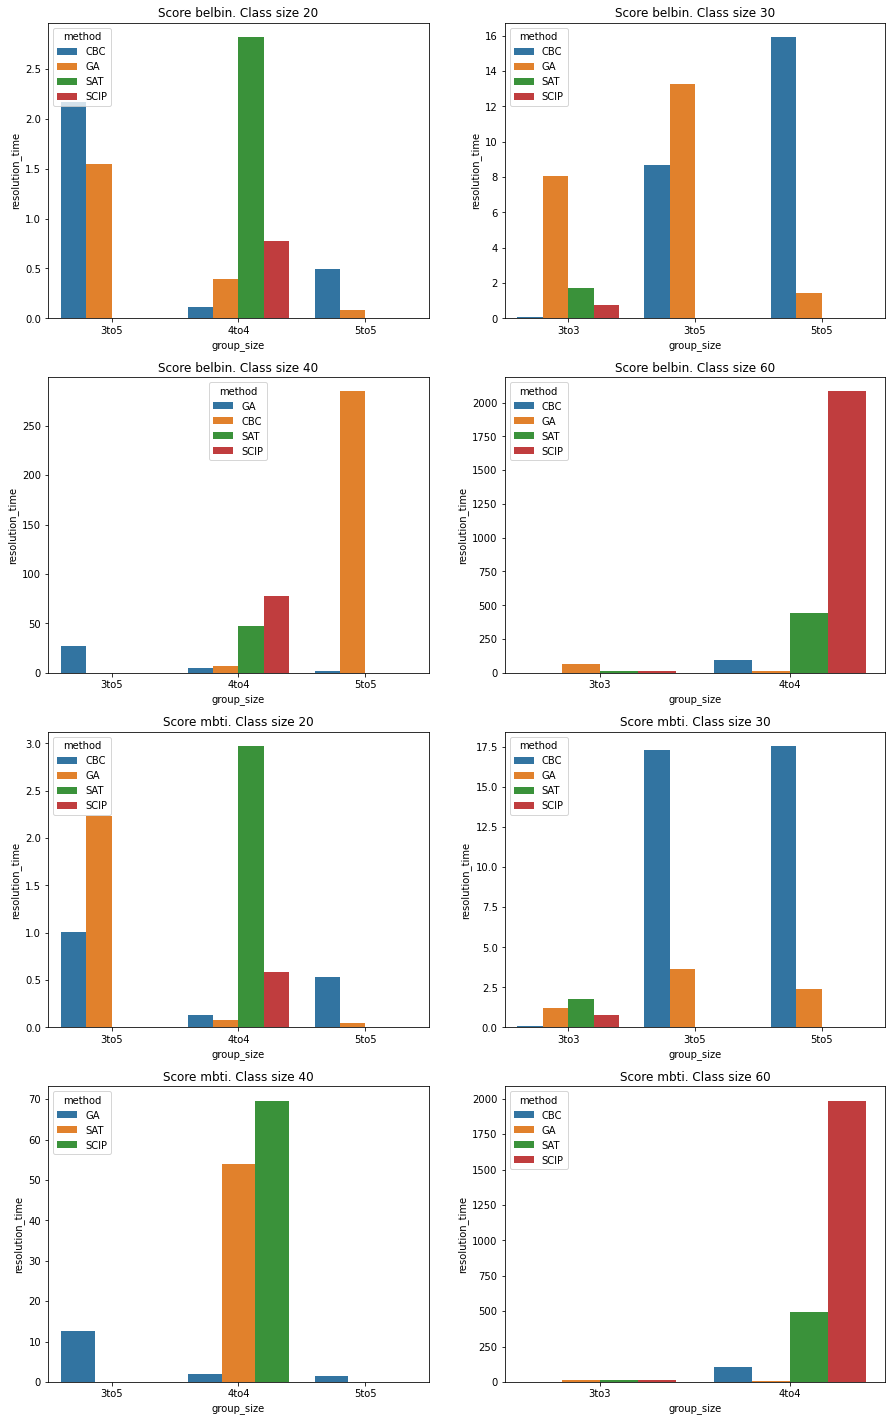

In [14]:
plt.figure(figsize=(15,25))
j=0
for score in pd.unique(ddd["score_type"]):
    for class_size in pd.unique(ddd["class_size"]):
        j+=1
        plt.subplot(4,2,j)
        d = ddd[(ddd["class_size"]==class_size)&(ddd["score_type"]==score)]
        d = d[~((d["method"].isin(["SCIP","SAT"]))&(d["group_size"].isin(["3to5","5to5"])))]
        sns.barplot(x="group_size",y="resolution_time",hue="method",data=d,)
        plt.title(f"Score {score}. Class size {class_size}")
        # plt.show()